In [257]:
hw_done = True    ## change this to True to mark your homework as done.

# Homework 4 
### ASTR-324, University of Washington

## Problem 1

Assume we have a coin that has some probability $b$ of flipping to tails. That is, if the coin always flipped to tails, $b = 1$; if it always flipped to heads, $b = 0$; and if the coin were fair, $b = 0.5$.

### Likelihood

The likelihood function for a single coin toss returning heads or tails is:

$$
\begin{align}
p({\rm tails}\,|\,b) & = b \\
p({\rm heads}\,|\,b) & = 1-b
\end{align}
$$

If we define a variable $o$ which is $1$ if the outcome was tails, and 0 if it was heads, the above can be written compactly as:

$$ p(o\,|\,b) = b^o \cdot (1-b)^{1-o} $$

(which you can verify by inserting $o=1$ for tails and and $o=0$ for heads).

### Posterior

Following the Bayes theorem, the posterior for the parameter $b$ after every coin toss will be given by:

$$ p(b\,|\,o) = C \cdot p(o\,|\,b) \cdot p(b) $$

where $p(b)$ is our prior probability (our knowledge) of what $b$ was before the new coin toss. $C$ is the normalizing constant that makes sure the posterior integrates to 1.

### The problems

Get a coin (a real coin!), flip it 10 times, and record the results.

Assuming the initial prior probability $p(b) \propto {\rm const.}$ over the entire range of $b$:

1. Plot the posterior $p(b \,|\, o )$ after each flip. In every plot, also show the $p(b)$ before the toss (the prior).

2. After each flip, print the probability that your coin is approximately fair; that is, what is the probability 
   $p(0.4 < b < 0.6)$? 

3. After each flip, print the probability that your coin strongly prefers heads over tails; that is, what is the probability $p(b<0.25)$? 

Note #1: Don't forget to normalize your posteriors (i.e., compute and multiply by the factor $C$)! This is easily done numerically, for example:

```python
b = np.linspace(0,1,5000)
db = b[1]-b[0]

p = ... compute unnormalized posterior by multiplying likelihood and prior ...
C = 1. / (p * db).sum()  # Riemann sum with simple "rectangle rule"
p = C * p  # our normalized posterior
```

Look at the lecture notes for similar computations.

## Problem 2

Repeat the analysis of Problem 1, but starting with the [Jeffreys' prior](https://en.wikipedia.org/wiki/Jeffreys_prior):

$$ p(b) = p^{-0.5}(1-p)^{-0.5}$$

Discuss the difference in how the probabilities change with each coin toss, comparing them to what you obtained in Problem #1. How are they affected by the choice of initial prior? Is there a difference early on vs. after many flips?

Note: Jeffreys' prior is an [improper prior](https://en.wikipedia.org/wiki/Prior_probability#Improper_priors), with singularities (infinities) at $b=0$ and $b=1$. Therefore when you compute and plot it, choose a range some $\epsilon$ away from those (e.g., [0.00001, 0.99999], rather than a full range [0, 1]). Otherwise `numpy` and `matplotlib` will complain about infinities in plots where the Jeffreys prior shows up.

# Homework 4: Solutions

### Some useful definitions and functions

In [204]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

## Problem 1: the coin toss

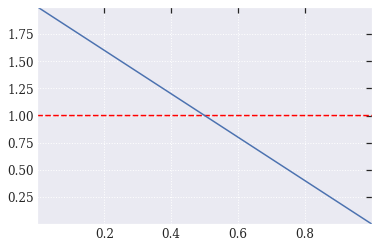

In [205]:
# results for my coin (0:head, 1: tail)
flipData = [1, 0, 0, 0, 1, 0, 1, 1, 0, 1]

# b grid for computing p(b) 
b = np.linspace(0.00001,1-0.00001,5000)
db = b[1]-b[0]

#for i in range(len(flipData)):
#   if flipData[i] == 1:
#       o = 1
#   else:
#       o = 0

posterior1 = (b**flipData[1]*(1-b)**(1-flipData[1]))
C = 1. / (posterior1*db).sum()
posterior1 = C * posterior1

plt.plot(b,np.linspace(1,1,5000), linestyle = '--', color = 'red')
plt.plot(b,posterior1) 

In [206]:
prob1 = posterior1[(b>=0.4)&(b<=0.6)]
prob1.sum()*db

0.2

In [207]:
prob1b = posterior1[(b<=0.25)]
prob1b.sum()*db

0.43753375675135026

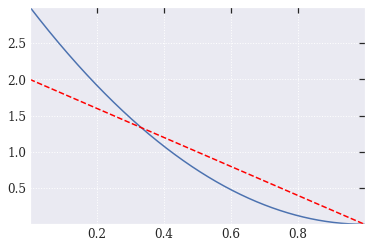

In [208]:
posterior2 = (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior1
C = 1. / (posterior2*db).sum()
posterior2 = C * posterior2

plt.plot(b,posterior2)
plt.plot(b,posterior1,linestyle = '--',color = 'red')

In [209]:
prob2 = posterior2[(b>=0.4)&(b<=0.6)]
prob2.sum()*db

0.15198703692732723

In [210]:
prob2b = posterior2[(b<=0.25)]
prob2b.sum()*db

0.5781629750698146

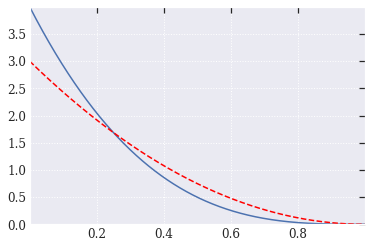

In [211]:
posterior3 = (b**flipData[2]*(1-b)**(1-flipData[2])) * posterior2
C = 1. / (posterior3*db).sum()
posterior3 = C * posterior3

plt.plot(b,posterior3)
plt.plot(b,posterior2,linestyle = '--',color = 'red')

In [212]:
prob3 = posterior3[(b>=0.4)&(b<=0.6)]
prob3.sum()*db

0.10398271617843952

In [213]:
prob3b = posterior3[(b<=0.25)]
prob3b.sum()*db

0.683631726140932

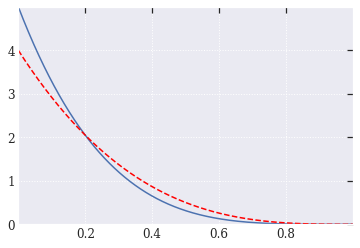

In [214]:
posterior4 = (b**flipData[3]*(1-b)**(1-flipData[3])) * posterior3
C = 1. / (posterior4*db).sum()
posterior4 = C * posterior4

plt.plot(b,posterior4)
plt.plot(b,posterior3,linestyle = '--',color = 'red')

In [215]:
prob5 = posterior5[(b>=0.4)&(b<=0.6)]
prob5.sum()*db

0.017544307392587864

In [216]:
prob5b = posterior5[(b<=0.25)]
prob5b.sum()*db

0.9222946933423187

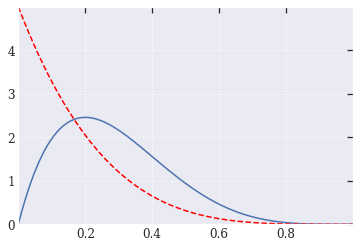

In [217]:
posterior5 = (b**flipData[4]*(1-b)**(1-flipData[4])) * posterior4
C = 1. / (posterior5*db).sum()
posterior5 = C * posterior5

plt.plot(b,posterior5)
plt.plot(b,posterior4,linestyle = '--',color = 'red')

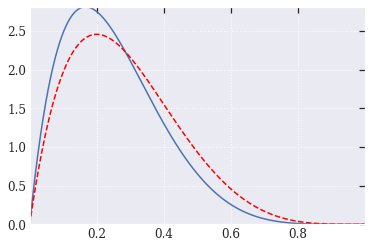

In [218]:
posterior6 = (b**flipData[5]*(1-b)**(1-flipData[5])) * posterior5
C = 1. / (posterior6*db).sum()
posterior6 = C * posterior6

plt.plot(b,posterior6)
plt.plot(b,posterior5,linestyle = '--',color = 'red')

In [219]:
prob6 = posterior6[(b>=0.4)&(b<=0.6)]
prob6.sum()*db

0.13981697185732814

In [220]:
prob6b = posterior6[(b<=0.25)]
prob6b.sum()*db

0.5549415218240595

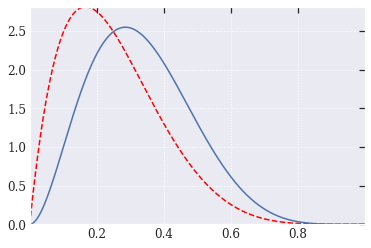

In [221]:
posterior7 = (b**flipData[6]*(1-b)**(1-flipData[6])) * posterior6
C = 1. / (posterior7*db).sum()
posterior7 = C * posterior7

plt.plot(b,posterior7)
plt.plot(b,posterior6,linestyle = '--',color = 'red')

In [222]:
prob7 = posterior7[(b>=0.4)&(b<=0.6)]
prob7.sum()*db

0.26563597888871854

In [223]:
prob7b = posterior7[(b<=0.25)]
prob7b.sum()*db

0.3213447580987609

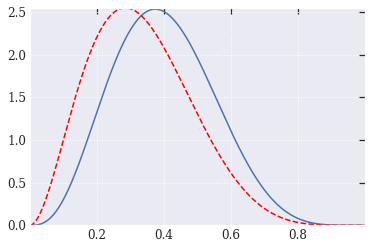

In [224]:
posterior8 = (b**flipData[7]*(1-b)**(1-flipData[7])) * posterior7
C = 1. / (posterior8*db).sum()
posterior8 = C * posterior8

plt.plot(b,posterior8)
plt.plot(b,posterior7,linestyle = '--',color = 'red')

In [225]:
prob8 = posterior8[(b>=0.4)&(b<=0.6)]
prob8.sum()*db

0.38332232437620156

In [226]:
prob8b = posterior8[(b<=0.25)]
prob8b.sum()*db

0.16564158981177893

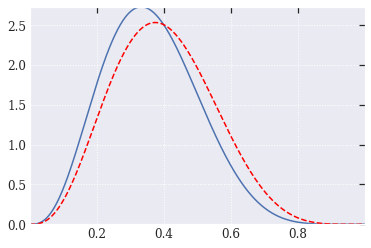

In [227]:
posterior9 = (b**flipData[8]*(1-b)**(1-flipData[8])) * posterior8
C = 1. / (posterior9*db).sum()
posterior9 = C * posterior9

plt.plot(b,posterior9)
plt.plot(b,posterior8,linestyle = '--',color = 'red')

In [228]:
prob9 = posterior9[(b>=0.4)&(b<=0.6)]
prob9.sum()*db

0.3275772587426146

In [229]:
prob9b = posterior9[(b<=0.25)]
prob9b.sum()*db

0.22401976273832785

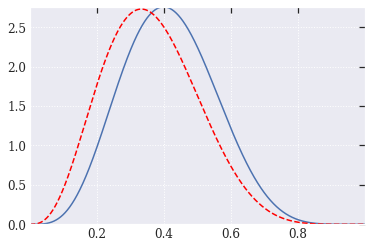

In [230]:
posterior10 = (b**flipData[9]*(1-b)**(1-flipData[9])) * posterior9
C = 1. / (posterior10*db).sum()
posterior10 = C * posterior10

plt.plot(b,posterior10)
plt.plot(b,posterior9,linestyle = '--',color = 'red')

In [231]:
prob10 = posterior10[(b>=0.4)&(b<=0.6)]
prob10.sum()*db

0.4334933842133486

In [232]:
prob10b = posterior10[(b<=0.25)]
prob10b.sum()*db

0.11455411574790376

## Problem 2: reanalysis with the Jeffreys prior

(0, 50)

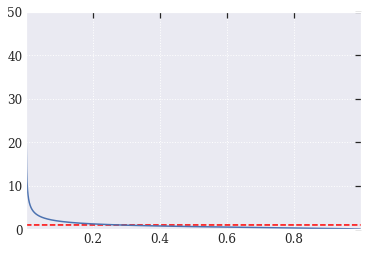

In [256]:
# results for my coin (0:head, 1: tail)
flipData = [1, 0, 0, 0, 1, 0, 1, 1, 0, 1]

# b grid for computing p(b) 
b = np.linspace(0.00001,1-0.00001,5000)
db = b[1]-b[0]

#for i in range(len(flipData)):
#   if flipData[i] == 1:
#       o = 1
#   else:
#       o = 0
posterior1 = (b**(-0.5)*(1-b)**(-0.5)) * (b**flipData[1]*(1-b)**(1-flipData[1]))
C = 1. / (posterior1*db).sum()
posterior1 = C * posterior1
plt.plot(b,np.linspace(1,1,5000), linestyle = '--', color = 'red')
plt.plot(b,posterior1)
plt.ylim((0,50))

(0, 50)

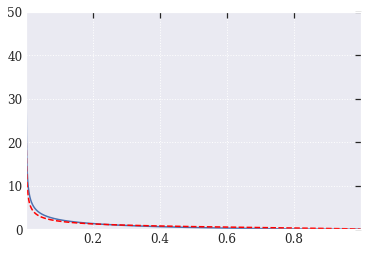

In [255]:
posterior2 = (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior1
C = 1. / (posterior2*db).sum()
posterior2 = C * posterior2

plt.plot(b,posterior2)
plt.plot(b,posterior1,linestyle = '--',color = 'red')
plt.ylim((0,50))

(0, 50)

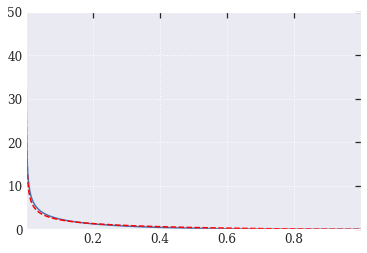

In [254]:
posterior3 =  (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior2
C = 1. / (posterior3*db).sum()
posterior3 = C * posterior3

plt.plot(b,posterior3)
plt.plot(b,posterior2,linestyle = '--',color = 'red')
plt.ylim((0,50))

(0, 50)

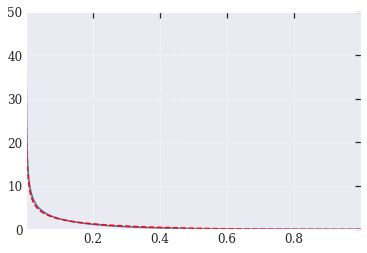

In [253]:
posterior4 =  (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior3
C = 1. / (posterior4*db).sum()
posterior4 = C * posterior4

plt.plot(b,posterior4)
plt.plot(b,posterior3,linestyle = '--',color = 'red')
plt.ylim((0,50))

(0, 50)

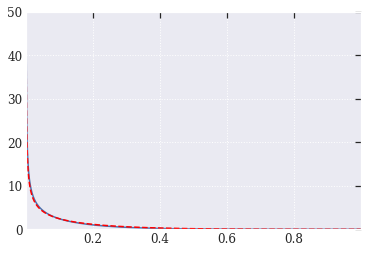

In [252]:
posterior5 =  (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior4
C = 1. / (posterior5*db).sum()
posterior5 = C * posterior5

plt.plot(b,posterior5)
plt.plot(b,posterior4,linestyle = '--',color = 'red')
plt.ylim((0,50))

(0, 50)

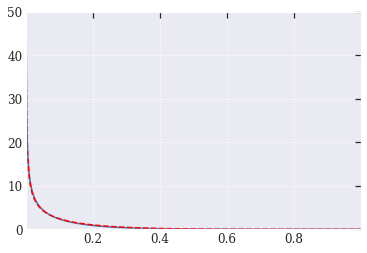

In [251]:
posterior6 =  (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior5
C = 1. / (posterior6*db).sum()
posterior6 = C * posterior6

plt.plot(b,posterior6)
plt.plot(b,posterior5,linestyle = '--',color = 'red')
plt.ylim((0,50))

(0, 50)

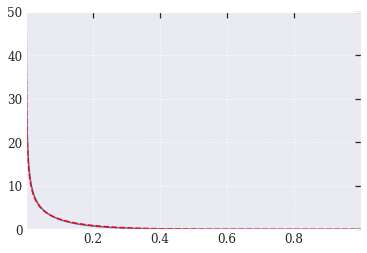

In [250]:
posterior7 = (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior6
C = 1. / (posterior7*db).sum()
posterior7 = C * posterior7

plt.plot(b,posterior7)
plt.plot(b,posterior6,linestyle = '--',color = 'red')
plt.ylim((0,50))

(0, 50)

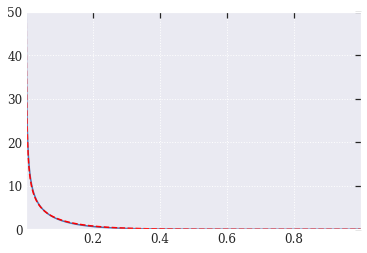

In [248]:
posterior8 =  (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior7
C = 1. / (posterior8*db).sum()
posterior8 = C * posterior8

plt.plot(b,posterior8)
plt.plot(b,posterior7,linestyle = '--',color = 'red')
plt.ylim((0,50))

(0, 50)

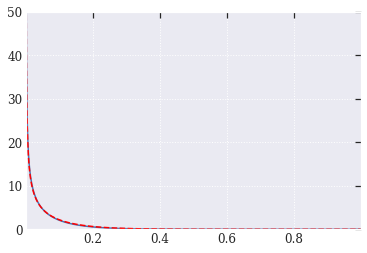

In [247]:
posterior9 =  (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior8
C = 1. / (posterior9*db).sum()
posterior9 = C * posterior9

plt.plot(b,posterior9)
plt.plot(b,posterior8,linestyle = '--',color = 'red')
plt.ylim((0,50))

(0, 50)

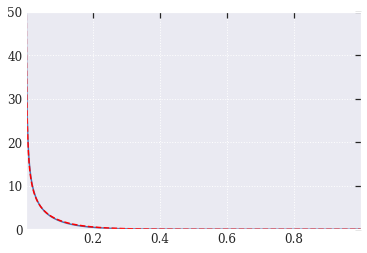

In [246]:
posterior10 =  (b**flipData[1]*(1-b)**(1-flipData[1])) * posterior9
C = 1. / (posterior10*db).sum()
posterior10 = C * posterior10

plt.plot(b,posterior10)
plt.plot(b,posterior9,linestyle = '--',color = 'red')
plt.ylim((0,50))

Don't forget to comment on the results, as asked in the problem statement.

In [243]:
#They are both completely different. For the first problem, we can see that as we continue to calculate the prior our probability gets closer to what we expect
#whereas with Jeffrey's prior we have something that doesnt nearly give us the same probability.